# CRUD Operations

In [3]:
import csv
import json
import pymongo
myclient = pymongo.MongoClient()
from mrjob.job import MRJob
from mrjob.step import MRStep

In [4]:
csvfile = open('movies.csv',encoding = 'ISO-8859-1')
reader = csv.DictReader( csvfile )
# now csv data is stored in reader
db=myclient.test
db.segment.drop() # segment is our collecion name
header=["movieId","title","genres"]
# below code is to add data to db from reader
# Implemented CREATE
for each in reader:
    row={}
    for field in header:
        row[field]=each[field]

    db.segment.insert_one(row) 

In [18]:
# Implemented READ
# This will force the cursor to iterate over each object and put it in a list()
# db.segment.find({})
list(db.segment.find({}))

[{'_id': ObjectId('5ec3b62968771c65d7f70bbe'),
  'movieId': '1',
  'title': 'Toy Story (1995)',
  'genres': 'Adventure|Animation|Children|Comedy|Fantasy'},
 {'_id': ObjectId('5ec3b62968771c65d7f70bbf'),
  'movieId': '2',
  'title': 'Jumanji (1995)',
  'genres': 'Adventure|Children|Fantasy'},
 {'_id': ObjectId('5ec3b62968771c65d7f70bc0'),
  'movieId': '3',
  'title': 'Grumpier Old Men (1995)',
  'genres': 'Comedy|Romance'},
 {'_id': ObjectId('5ec3b62968771c65d7f70bc1'),
  'movieId': '4',
  'title': 'Waiting to Exhale (1995)',
  'genres': 'Comedy|Drama|Romance'},
 {'_id': ObjectId('5ec3b62968771c65d7f70bc2'),
  'movieId': '5',
  'title': 'Father of the Bride Part II (1995)',
  'genres': 'Comedy'},
 {'_id': ObjectId('5ec3b62968771c65d7f70bc3'),
  'movieId': '6',
  'title': 'Heat (1995)',
  'genres': 'Action|Crime|Thriller'},
 {'_id': ObjectId('5ec3b62968771c65d7f70bc4'),
  'movieId': '7',
  'title': 'Sabrina (1995)',
  'genres': 'Comedy|Romance'},
 {'_id': ObjectId('5ec3b62968771c65d7f70b

In [12]:
# Implented DELETE
db.segment.remove({}) 

c:\python\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  """Entry point for launching an IPython kernel.


{'n': 27278, 'ok': 1.0}

In [13]:
list(db.segment.find({}))

[]

In [19]:
# Implemented UPDATE
# db.segment.updateOne({})
db.segment.find_one_and_update(
            {
                "movieId":'42'
            },
            {
                '$set':{
                    "genres":"Comedy|Romance"
                }
            },
            projection={'seq': True,'_id':False},
            upsert=True,
)

{}

In [20]:
list(db.segment.find({}))

[{'_id': ObjectId('5ec3b62968771c65d7f70bbe'),
  'movieId': '1',
  'title': 'Toy Story (1995)',
  'genres': 'Adventure|Animation|Children|Comedy|Fantasy'},
 {'_id': ObjectId('5ec3b62968771c65d7f70bbf'),
  'movieId': '2',
  'title': 'Jumanji (1995)',
  'genres': 'Adventure|Children|Fantasy'},
 {'_id': ObjectId('5ec3b62968771c65d7f70bc0'),
  'movieId': '3',
  'title': 'Grumpier Old Men (1995)',
  'genres': 'Comedy|Romance'},
 {'_id': ObjectId('5ec3b62968771c65d7f70bc1'),
  'movieId': '4',
  'title': 'Waiting to Exhale (1995)',
  'genres': 'Comedy|Drama|Romance'},
 {'_id': ObjectId('5ec3b62968771c65d7f70bc2'),
  'movieId': '5',
  'title': 'Father of the Bride Part II (1995)',
  'genres': 'Comedy'},
 {'_id': ObjectId('5ec3b62968771c65d7f70bc3'),
  'movieId': '6',
  'title': 'Heat (1995)',
  'genres': 'Action|Crime|Thriller'},
 {'_id': ObjectId('5ec3b62968771c65d7f70bc4'),
  'movieId': '7',
  'title': 'Sabrina (1995)',
  'genres': 'Comedy|Romance'},
 {'_id': ObjectId('5ec3b62968771c65d7f70b

In [25]:
# Check for UPDATE
print(db.segment.find_one({'movieId':'42'})) 

{'_id': ObjectId('5ec3b62968771c65d7f70be7'), 'movieId': '42', 'title': 'Dead Presidents (1995)', 'genres': 'Comedy|Romance'}


In [26]:
# CRUD DONE!!!!!

In [27]:
db.collection.mapReduce(
   function() {emit('movieId',value);},  //map function
   function(key,values) {return reduceFunction}, {   //reduce function
      out: collection,
      query: document,
      sort: document,
      limit: number
   }
)

SyntaxError: invalid syntax (<ipython-input-27-75735800da81>, line 2)

In [ ]:
# https://hendra-herviawan.github.io/Movie-Recommendation-based-on-KNN-K-Nearest-Neighbors.html

In [1]:
import csv
import json
import pymongo
myclient = pymongo.MongoClient()
from mrjob.job import MRJob
from mrjob.step import MRStep

In [2]:
csvfile = open('movies.csv',encoding = 'ISO-8859-1')
reader = csv.DictReader( csvfile )
# now csv data is stored in reader
db=myclient.test


FileNotFoundError: [Errno 2] No such file or directory: 'movies.csv'

In [5]:
# https://towardsdatascience.com/unsupervised-classification-project-building-a-movie-recommender-with-clustering-analysis-and-4bab0738efe6

In [6]:
# https://hendra-herviawan.github.io/Movie-Recommendation-based-on-KNN-K-Nearest-Neighbors.html

In [7]:
# https://github.com/digantamisra98/KMeans-Movie-Ratings/blob/master/k-means%20Clustering%20of%20Movie%20Ratings.ipynb

In [8]:
# https://mrjob.readthedocs.io/en/latest/guides/writing-mrjobs.html#writing-custom-protocols

In [10]:
# https://mrjob.readthedocs.io/en/latest/guides/writing-mrjobs.html#protocols

#  Kmeans

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
movies = pd.read_csv('/home/ashwin_hs/Desktop/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_csv('/home/ashwin_hs/Desktop/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')

The dataset contains:  100836  ratings of  9742  movies.


In [7]:
def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:        
        genre_movies = movies[movies['genres'].str.contains(genre) ]
        avg_genre_votes_per_user = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
        
        genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)
        
    genre_ratings.columns = column_names
    return genre_ratings

In [8]:
genre_ratings = get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head()

,avg_romance_rating,avg_scifi_rating
1,4.31,4.22
2,4.50,3.88
3,0.50,4.20
4,3.38,2.83
5,3.09,2.50


In [9]:
def bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
    biased_dataset =    genre_ratings[((genre_ratings['avg_romance_rating'] < score_limit_1 - 0.2) & (genre_ratings['avg_scifi_rating'] > score_limit_2)) | ((genre_ratings['avg_scifi_rating'] < score_limit_1) & (genre_ratings['avg_romance_rating'] > score_limit_2))]
    biased_dataset = pd.concat([biased_dataset[:300], genre_ratings[:2]])
    biased_dataset = pd.DataFrame(biased_dataset.to_records())
    return biased_dataset

In [10]:
biased_dataset = bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)

In [11]:
print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  162


,index,avg_romance_rating,avg_scifi_rating
0,3,0.50,4.20
1,4,3.38,2.83
2,5,3.09,2.50
3,7,2.65,3.15
4,9,3.17,3.00


In [12]:
def draw_scatterplot(x_data, x_label, y_data, y_label):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.scatter(x_data, y_data, s=30)

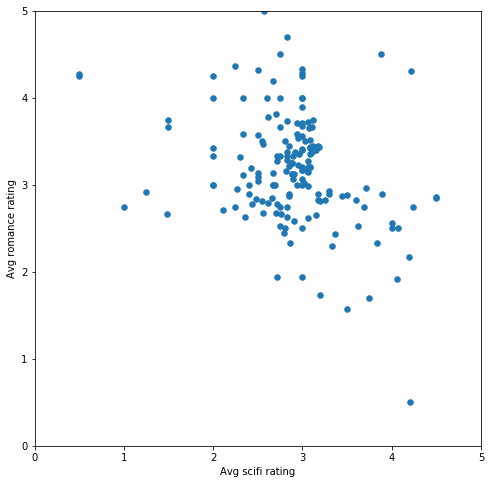

In [13]:
draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')

In [14]:
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans_1 = KMeans(n_clusters=2)

In [17]:
predictions = kmeans_1.fit_predict(X)

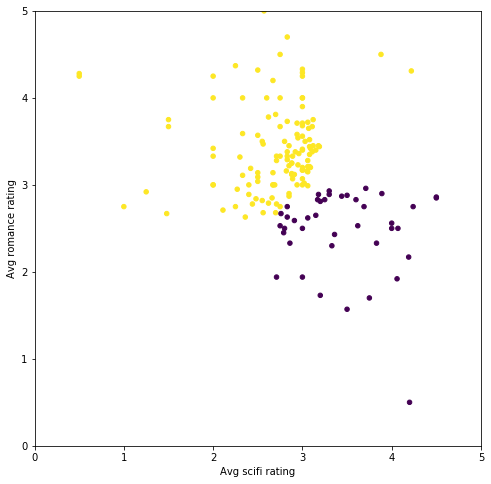

In [19]:
def draw_clusters(biased_dataset, predictions, cmap='viridis'):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg scifi rating')
    ax.set_ylabel('Avg romance rating')
    clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    plt.scatter(clustered['avg_scifi_rating'], clustered['avg_romance_rating'], c=clustered['group'], s=20, cmap=cmap)
# Plot
draw_clusters(biased_dataset, predictions)

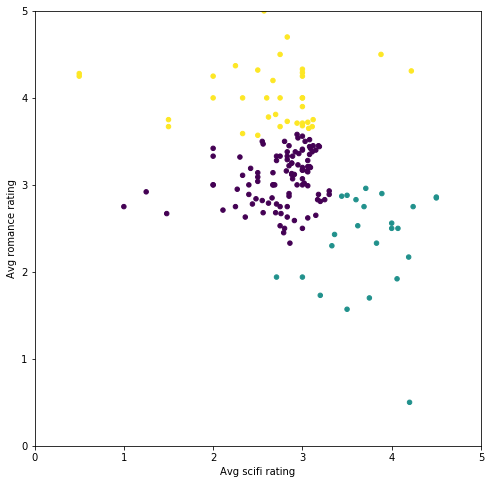

In [20]:
# Create an instance of KMeans to find three clusters
kmeans_2 = KMeans(n_clusters=3)
# Use fit_predict to cluster the dataset
predictions_2 = kmeans_2.fit_predict(X)
# Plot
draw_clusters(biased_dataset, predictions_2)

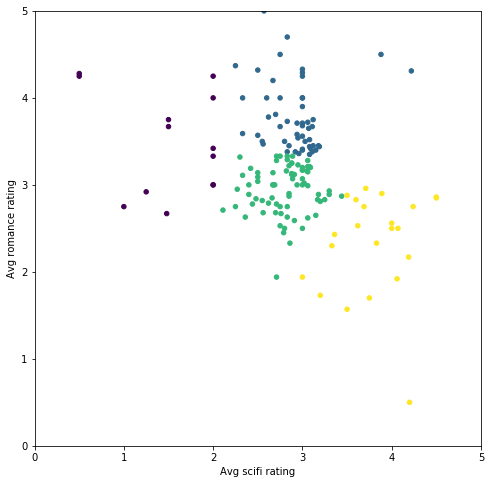

In [21]:
# Create an instance of KMeans to find three clusters
kmeans_3 = KMeans(n_clusters=4)
# Use fit_predict to cluster the dataset
predictions_3 = kmeans_3.fit_predict(X)
# Plot
draw_clusters(biased_dataset, predictions_3)

# KNN

In [43]:
import pandas as pd
import numpy as np
from scipy import spatial
import operator

# Get ratings people give to movies
r_cols = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('/home/ashwin_hs/Desktop/Bda_dataFile/ml-100k/u.data', sep='\t', names=r_cols, usecols=range(3))

# Divide film ratings into total size and average
movieProperties = ratings.groupby('movie_id').agg({'rating': [np.size, np.mean]})

# Normalize rating sizes of movies
movieNumRatings = pd.DataFrame(movieProperties['rating']['size'])
movieNormalizedNumRatings = movieNumRatings.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

# Get film data
movieDict = {}
with open('/home/ashwin_hs/Desktop/Bda_dataFile/ml-100k/u.item', mode='r', encoding='ISO-8859-1') as f:
    temp = ''

    for line in f:
        fields = line.rstrip('\n').split('|')
        movieID = int(fields[0])
        name = fields[1]
        genres = fields[5:25]
        genres = list(map(int, genres))
        movieDict[movieID] = (name, genres, movieNormalizedNumRatings.loc[movieID].get('size'),
                              movieProperties.loc[movieID].rating.get('mean'))


# Function to calculate distances between movies
def ComputeDistance(a, b):
    genresA = a[1]
    genresB = b[1]
    genreDistance = spatial.distance.cosine(genresA, genresB)
    popularityA = a[2]
    popularityB = b[2]
    popularityDistance = abs(popularityA - popularityB)
    return genreDistance + popularityDistance


# Get the neighbor K of the given film
def getNeighbors(movieID, K):
    distances = []
    for movie in movieDict:
        if (movie != movieID):
            dist = ComputeDistance(movieDict[movieID], movieDict[movie])
            distances.append((movie, dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(K):
        neighbors.append(distances[x][0])
    return neighbors


K = 5
avgRating = 0
neighbors = getNeighbors(1, K)
print("5 Neighbors:")
for neighbor in neighbors:
    avgRating += movieDict[neighbor][3]
    print(movieDict[neighbor][0] + " " + str(movieDict[neighbor][3]))

# Average rating score calculated based on film neighbors
avgRating /= float(K)
print("\nEstimated avg. rating:")
print(avgRating)

# Real avg. rating
print("\nReal avg. rating:")
print(movieDict[1][3])

5 Neighbors:
Liar Liar (1997) 3.156701030927835
Aladdin (1992) 3.8127853881278537
Willy Wonka and the Chocolate Factory (1971) 3.6319018404907975
Monty Python and the Holy Grail (1974) 4.0664556962025316
Full Monty, The (1997) 3.926984126984127

Estimated avg. rating:
3.7189656165466287

Real avg. rating:
3.8783185840707963


In [1]:
# MapReduce using mrjob
# from mrjob.job import MRJob
# class MoviesByUserCounter(MRJob):

#     def mapper(self, key, line):
#         (userID, movieID, rating, timestamp) = line.split('\t')
#         yield userID, movieID

#     def reducer(self, user, movies):
#         numMovies=0
#         for movie in movies:
#             numMovies+=1    
#         yield user, numMovies
        
        

# if __name__ == '__main__':
#     MoviesByUserCounter.run()
!python mr_word_count.py ml-100k/u.data 

"1"	272
"10"	184
"100"	59
"101"	67
"102"	216
"103"	29
"104"	111
"105"	23
"106"	64
"107"	22
"108"	33
"109"	234
"11"	181
"110"	133
"111"	24
"112"	46
"113"	51
"114"	48
"115"	92
"116"	143
"117"	86
"118"	71
"119"	181
"12"	51
"120"	26
"121"	74
"122"	61
"123"	54
"124"	24
"125"	182
"126"	45
"127"	23
"128"	184
"129"	30
"13"	636
"130"	353
"131"	30
"132"	22
"133"	26
"134"	25
"135"	55
"136"	35
"137"	47
"138"	51
"139"	24
"14"	98
"140"	21
"141"	107
"142"	33
"143"	20
"144"	206
"145"	316
"146"	29
"147"	20
"148"	65
"149"	36
"15"	104
"150"	32
"151"	307
"152"	106
"153"	23
"154"	51
"155"	22
"156"	37
"157"	51
"158"	173
"159"	107
"16"	140
"160"	120
"161"	58
"162"	42
"163"	23
"164"	63
"165"	30
"166"	20
"167"	69
"168"	69
"169"	37
"17"	28
"170"	22
"171"	28
"172"	27
"173"	43
"174"	177
"175"	38
"176"	63
"177"	115
"178"	273
"179"	42
"18"	277
"180"	63
"181"	435
"182"	28
"183"	53
"184"	251
"185"	48
"186"	92
"187"	56
"188"	112
"189"	187
"19"	20
"190"	59
"191"	27
"192"	35
"193"	121
"194"	305
"195"	96
"196"	39
"197"	1

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory C:\Users\admin\AppData\Local\Temp\mr_word_count.admin.20200521.171225.155619
Running step 1 of 1...
job output is in C:\Users\admin\AppData\Local\Temp\mr_word_count.admin.20200521.171225.155619\output
Streaming final output from C:\Users\admin\AppData\Local\Temp\mr_word_count.admin.20200521.171225.155619\output...
Removing temp directory C:\Users\admin\AppData\Local\Temp\mr_word_count.admin.20200521.171225.155619...
